In [1]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [4]:
import pandas as pd

In [5]:
# # Flip Flop
problem_ffp = mh.FlipFlopGenerator().generate(seed=0, size=1000)
#state = problem_ffp.get_state()

In [6]:
# GAB runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GABRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[20, 50, 100, 150],
              mutation_rates=[0.1, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [7]:
df_run_curves_ffp.shape

(11710, 7)

In [8]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.004599,516.0,0.0,20,0.1,2048
1,1,0.035262,540.0,2.0,20,0.1,2048
2,2,0.065225,545.0,4.0,20,0.1,2048
3,3,0.092632,548.0,6.0,20,0.1,2048
4,4,0.104379,548.0,7.0,20,0.1,2048


In [9]:
df_run_curves_ffp['Fitness'].max()

999.0

In [47]:
# need to check Time and FEvals

In [10]:
df_run_curves_ffp.dtypes

Iteration            int64
Time               float64
Fitness            float64
FEvals             float64
Population Size      int64
Mutation Rate      float64
max_iters            int64
dtype: object

In [11]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [12]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
5842,1744,15.716184,999.0,2077.0,50,0.10,2048
7519,1676,15.293798,999.0,2017.0,50,0.08,2048
8564,1044,7.952711,999.0,1355.0,100,0.10,2048
9737,1172,9.010886,999.0,1468.0,100,0.08,2048
10794,1056,8.079248,999.0,1336.0,150,0.10,2048
11709,914,6.857662,999.0,1195.0,150,0.08,2048


In [13]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,50,0.08,2017.0,1676.0,15.293798
1,50,0.10,2077.0,1744.0,15.716184
2,100,0.08,1468.0,1172.0,9.010886
3,100,0.10,1355.0,1044.0,7.952711
4,150,0.08,1195.0,914.0,6.857662
5,150,0.10,1336.0,1056.0,8.079248


In [52]:
# pick pop size = 150 and mutation_rate = 0.08, with smallest FEvals, iterations and time

In [14]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.004599,516.0,0.0,20,0.1,2048
1,1,0.035262,540.0,2.0,20,0.1,2048
2,2,0.065225,545.0,4.0,20,0.1,2048
3,3,0.092632,548.0,6.0,20,0.1,2048
4,4,0.104379,548.0,7.0,20,0.1,2048


In [15]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [16]:
# GAB runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GABRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[150], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    #df_iter_curves_ffp = df_iter_curves_ffp.append(df_run_curves_ffp_sub)
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [49]:
#df_iter_curves_ffp.to_csv('df_iter_curves_ffp_gab_1000.csv', index=False)

In [17]:
df_iter_curves_ffp.shape

(9044, 7)

In [18]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.014961,516.0,0.0,150,0.08,2048
1,1,0.098749,546.0,2.0,150,0.08,2048
2,2,0.179312,564.0,4.0,150,0.08,2048
3,3,0.221501,566.0,6.0,150,0.08,2048
4,4,0.248935,566.0,7.0,150,0.08,2048


In [19]:
df_iter_curves_ffp.Iteration.max()

981

In [20]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [21]:
df_fitness_iter_ffp.shape

(982, 3)

In [22]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,496.0,233.777778
1,1,544.7,88.011111
2,2,548.7,101.788889
3,3,552.4,91.822222
4,4,554.9,58.766667


In [23]:
df_iter_curves_ffp.Fitness.max()

999.0

In [24]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

914    914
912    912
885    885
878    878
907    907
890    890
895    895
879    879
893    893
981    981
Name: Iteration, dtype: int64

In [25]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

981

In [26]:
df_fitness_iter_ffp.avg_fitness.max()

999.0

In [27]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [31]:
df_fitness_iter_ffp['stddev_fitness'].max()

15.289793254906288

In [28]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,496.0,233.777778,15.289793
1,1,544.7,88.011111,9.381424
2,2,548.7,101.788889,10.089048
3,3,552.4,91.822222,9.582391
4,4,554.9,58.766667,7.665942


Text(0, 0.5, 'Fitness')

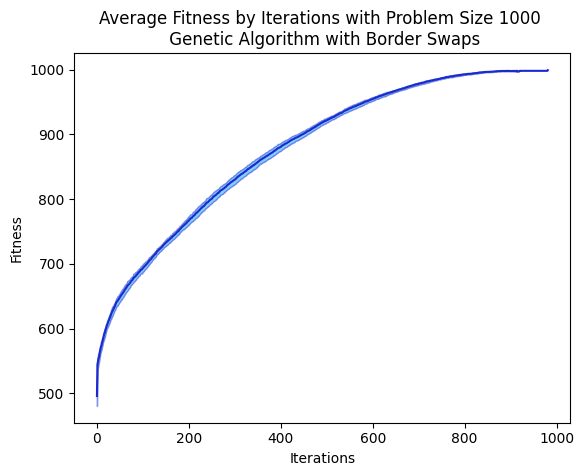

In [29]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#1B2ACC')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Average Fitness by Iterations with Problem Size 1000 \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [71]:
# Fevals - iteration

In [32]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [33]:
df_FEvals_iter_ffp.shape

(982, 3)

In [34]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,2.0,0.000000
2,2,3.6,0.266667
3,3,5.1,0.544444
4,4,6.6,1.155556


In [35]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [36]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 7.412987316351001)

In [37]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,2.0,0.000000,0.000000
2,2,3.6,0.266667,0.516398
3,3,5.1,0.544444,0.737865
4,4,6.6,1.155556,1.074968


In [51]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration']==981].avg_FEvals

981    1255.0
Name: avg_FEvals, dtype: float64

In [52]:
df_FEvals_iter_ffp.to_csv('df_FEvals_iter_1000_gab981.csv')

Text(0, 0.5, 'FEvals')

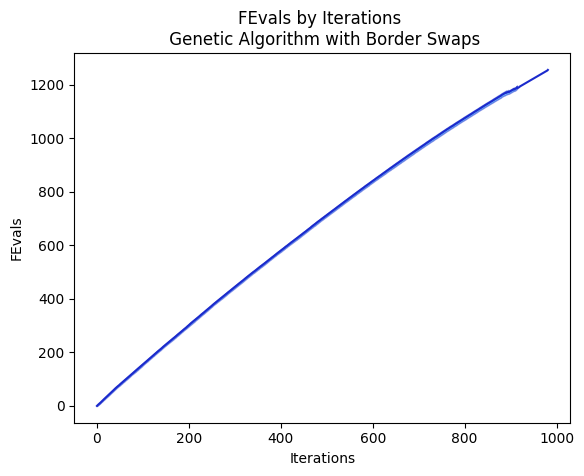

In [38]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#1B2ACC')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('FEvals by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [39]:
# fitness - wall clock time

In [40]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [41]:
df_time_iter_ffp.shape

(982, 3)

In [42]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.008758,0.000017
1,1,0.064842,0.001513
2,2,0.142796,0.013024
3,3,0.198087,0.017476
4,4,0.238002,0.019665


In [43]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [44]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.008758,0.000017,0.004088
1,1,0.064842,0.001513,0.038892
2,2,0.142796,0.013024,0.114125
3,3,0.198087,0.017476,0.132195
4,4,0.238002,0.019665,0.140230


In [46]:
df_time_iter_ffp.stddev_time.max()

15.222129565141996

Text(0, 0.5, 'Time')

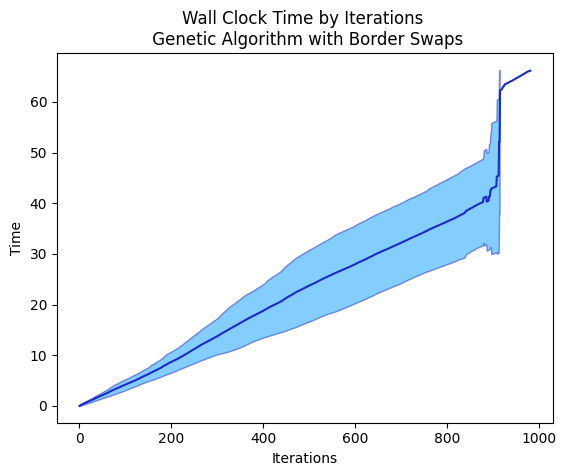

In [47]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#1B2ACC')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Wall Clock Time by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [48]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time==df_time_iter_ffp.stddev_time.max()].Iteration

911    911
Name: Iteration, dtype: int64

In [54]:
df_time_iter_ffp.avg_time.max()

66.17838143699919

In [55]:
df_time_iter_ffp.stddev_time.max()

15.222129565141996

In [56]:
df_time_iter_ffp.to_csv('df_time_iter_1000_gab981.csv')